<font size="+3" color=red><b> <center><u>Face Mask Detection using Transfer Learning </u></center></b></font>

# Objective
Goal of this kernel is following:
- Learn how to implement FastAI on image data.
- Learn how to implement CNN on custom data.
- Learn how to Resnet to get better accuracy.
- Provide Perfect Guide for all the tips and trick to implement CNN and get better accuracy as a Begineer.



In [1]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

In [2]:
x  = "../input/face-mask-dataset/data"
path = Path(x)
path.ls()

[PosixPath('../input/face-mask-dataset/data/without_mask'),
 PosixPath('../input/face-mask-dataset/data/with_mask')]

In [3]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

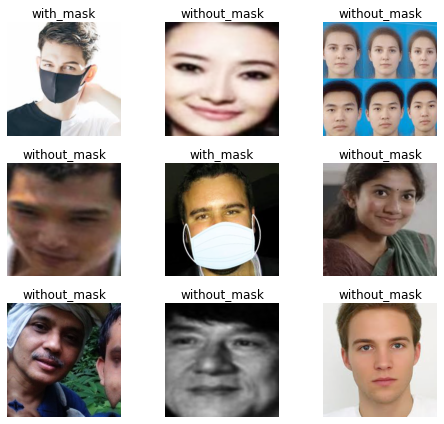

In [4]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)


In [5]:
print(data.classes)
len(data.classes)
data.c

['with_mask', 'without_mask']


2

In [6]:
data

ImageDataBunch;

Train: LabelList (6043 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
without_mask,without_mask,without_mask,without_mask,without_mask
Path: ../input/face-mask-dataset/data;

Valid: LabelList (1510 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
without_mask,with_mask,with_mask,without_mask,with_mask
Path: ../input/face-mask-dataset/data;

Test: None

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


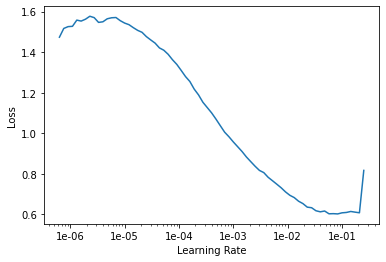

In [8]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [9]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.216644,0.528909,0.967550,01:19
1,0.504347,0.012026,0.998013,01:17
2,0.163236,0.007956,0.998013,01:16
3,0.059246,0.002048,0.998676,01:18


In [10]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.030209,0.001478,0.999338,01:20
1,0.067989,0.232626,0.977483,01:22
2,0.049258,0.012320,0.994702,01:21
3,0.043364,0.010096,0.996689,01:23
4,0.031994,0.014254,0.995364,01:22
5,0.027822,0.000564,1.000000,01:22
6,0.018827,0.451038,0.998013,01:21
7,0.012236,2.847701,0.996027,01:23
8,0.006585,0.002626,0.998676,01:22
9,0.004580,0.005462,0.997351,01:21


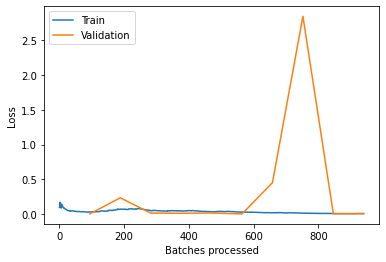

In [11]:
learn.recorder.plot_losses()

<a id="14"></a>
<font color="blue" size=+2.5><b>5.1 Interpret the results</b></font>
<br/>

Model performance can be validated in different ways. One of the popular methods is using the confusion matrix. Diagonal values of the matrix indicate correct predictions for each class, whereas other cell values indicate a number of wrong predictions.

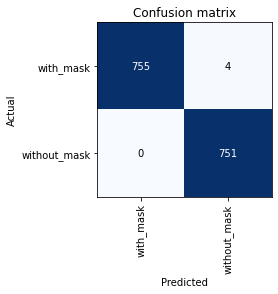

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

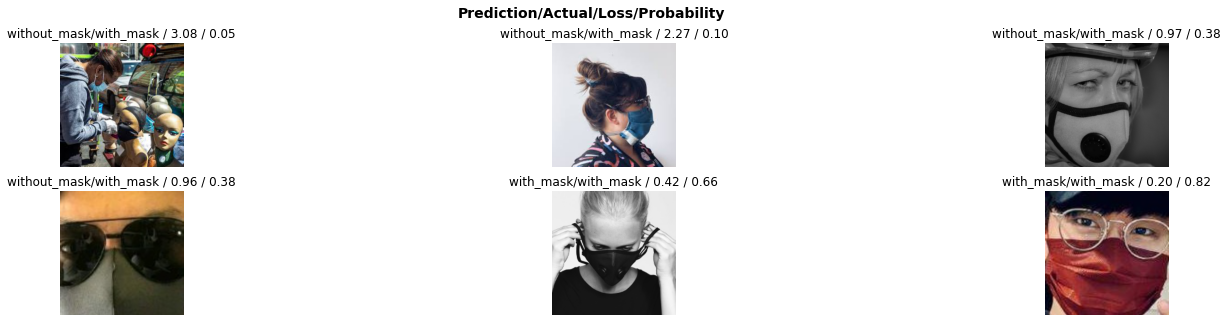

In [13]:
interp.plot_top_losses(6,figsize = (25,5))

In [14]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')